In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_311 = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')
df_indicators = pd.read_csv('/content/drive/My Drive/indicators.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 1


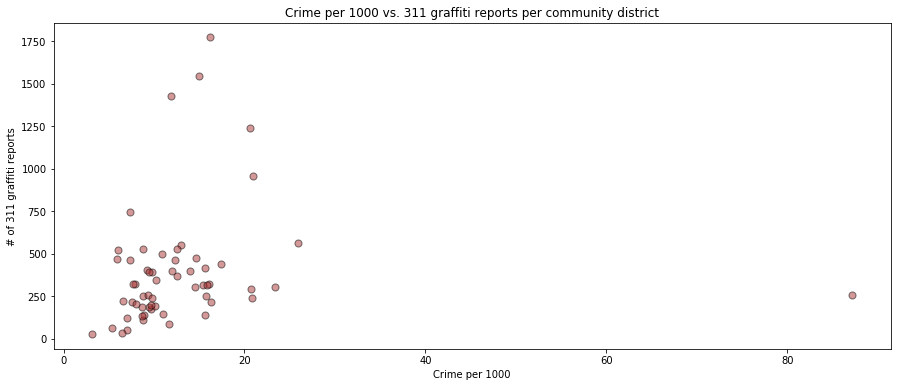

In [0]:
crime = df_indicators[['borocd', 'crime_per_1000']]
graffiti = df_311[df_311.complaint_type == 'Graffiti'].groupby('borocd').size().reset_index(name='graffiti_count')
graffiti_crime = pd.merge(crime, graffiti, how='inner', on='borocd')
graffiti_crime

plt.figure(figsize=(15, 6))
plt.scatter(graffiti_crime.crime_per_1000, graffiti_crime.graffiti_count, s=50, c='#a83232', edgecolors='black', alpha=0.5) 

plt.title('Crime per 1000 vs. 311 graffiti reports per community district')
plt.xlabel('Crime per 1000')
plt.ylabel('# of 311 graffiti reports')

plt.show()

(array([ 8., 24., 14.,  6.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.109412  ,  7.31526035, 11.5211087 , 15.72695705, 19.9328054 ,
        24.13865375, 28.3445021 , 32.55035045, 36.7561988 , 40.96204715,
        45.1678955 , 49.37374385, 53.5795922 , 57.78544055, 61.9912889 ,
        66.19713725, 70.4029856 , 74.60883395, 78.8146823 , 83.02053065,
        87.226379  ]),
 <a list of 20 Patch objects>)

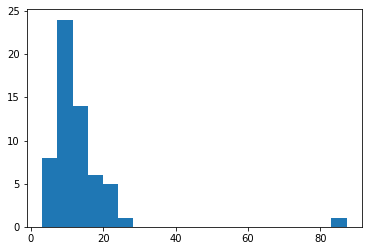

In [0]:
plt.hist(graffiti_crime.crime_per_1000, bins=20)

Text(0, 0.5, '# of 311 graffiti reports')

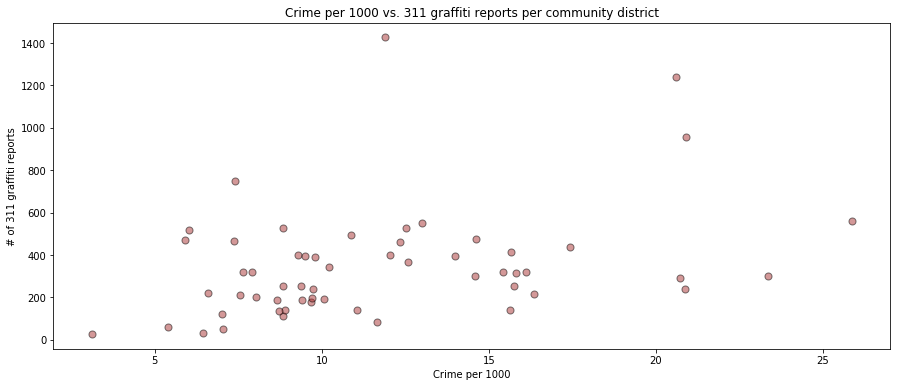

In [0]:
graffiti_crime_no_outlier = graffiti_crime[(np.abs(stats.zscore(graffiti_crime)) < 3).all(axis=1)]

plt.figure(figsize=(15, 6))
plt.scatter(graffiti_crime_no_outlier.crime_per_1000, graffiti_crime_no_outlier.graffiti_count, s=50, c='#a83232', edgecolors='black', alpha=0.5) 

plt.title('Crime per 1000 vs. 311 graffiti reports per community district')
plt.xlabel('Crime per 1000')
plt.ylabel('# of 311 graffiti reports')


In [0]:
np.corrcoef(graffiti_crime_no_outlier.crime_per_1000, graffiti_crime_no_outlier.graffiti_count)

array([[1.        , 0.34862955],
       [0.34862955, 1.        ]])

In [0]:
model = sm.OLS(graffiti_crime_no_outlier.graffiti_count, graffiti_crime_no_outlier.crime_per_1000).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         graffiti_count   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              114.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                    5.01e-15
Time:                        22:29:52   Log-Likelihood:                         -388.22
No. Observations:                  56   AIC:                                      778.4
Df Residuals:                      55   BIC:                                      780.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

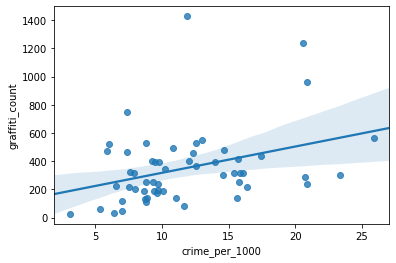

In [0]:
sns.regplot(
    x=graffiti_crime_no_outlier.crime_per_1000,
    y=graffiti_crime_no_outlier.graffiti_count)

Seems pretty poorly correlated to me!